In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Memuat dataset dengan melewati baris yang bermasalah
data = pd.read_csv("/content/sample_data/Tempat-Wisata-Toba-Preprocessing.csv", on_bad_lines='skip')

# Menyaring kolom yang relevan (ReviewerId, PlaceID, Rating)
data = data[['ReviewerId', 'PlaceID', 'Rating']]

# Menangani nilai yang hilang
data = data.dropna()

# Membagi data menjadi training, validation, dan test (70% - 15% - 15%)
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# Simpan data yang sudah dibagi
train_data.to_csv('train.csv', index=False)
val_data.to_csv('val.csv', index=False)
test_data.to_csv('test.csv', index=False)

## Kode ini digunakan untuk mempersiapkan data agar bisa digunakan dalam membangun model rekomendasi.
## Pertama, data dibaca dari file CSV yang berisi informasi ulasan tempat wisata.
## Kemudian, hanya kolom yang diperlukan, seperti ID reviewer, ID tempat wisata, dan rating yang diberikan, yang dipilih.
## Setelah itu, kode menghapus data yang hilang agar data yang digunakan lebih bersih.
## Selanjutnya, data dibagi menjadi tiga bagian: 70% untuk data pelatihan (untuk melatih model), 15% untuk data validasi (untuk mengevaluasi model selama proses pelatihan), dan 15% untuk data uji (untuk menguji kinerja model setelah dilatih).
## Terakhir, masing-masing bagian data disimpan dalam file terpisah agar lebih mudah digunakan.
## Pembagian ini penting supaya model bisa diuji dengan data yang belum pernah dilihat sebelumnya, sehingga hasilnya lebih akurat dan objektif.

In [5]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357278 sha256=9e7c012aef49bf83ebf9a933fbb4a22ccc410f13cb88654a689d1509a706221f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [6]:
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy


# Membaca dataset training
reader = Reader(rating_scale=(1, 5))  # Skala rating 1 hingga 5
train_data = Dataset.load_from_df(train_data[['ReviewerId', 'PlaceID', 'Rating']], reader)

# Melatih model BiasedMF (SVD dalam hal ini)
trainset = train_data.build_full_trainset()
model = SVD()  # Model Matrix Factorization dengan Bias

## Kode di atas digunakan untuk mempersiapkan dan melatih model rekomendasi menggunakan algoritma Matrix Factorization dengan bias,
## yang dalam hal ini diterapkan menggunakan SVD (Singular Value Decomposition) dari pustaka Surprise.
## Pertama, dataset pelatihan dibaca dan diproses menggunakan Reader dengan skala rating antara 1 hingga 5.
## Dataset kemudian dimuat ke dalam format yang sesuai untuk model Surprise menggunakan Dataset.load_from_df.
## Setelah itu, train_data.build_full_trainset() digunakan untuk membangun set data pelatihan lengkap, dan model SVD diinisialisasi untuk melakukan pelatihan.
## Model ini akan digunakan untuk memprediksi rating yang diberikan oleh pengguna pada tempat-tempat wisata berdasarkan pola dalam data.

In [7]:
# Melatih model
model.fit(trainset)
## Kode di atas melatih model menggunakan data pelatihan yang telah dipersiapkan sebelumnya.
## Fungsi model.fit(trainset) digunakan untuk melatih model SVD (Singular Value Decomposition) dengan set data pelatihan lengkap (trainset).
## Proses ini akan mengoptimalkan parameter model agar dapat mempelajari pola dan hubungan antara pengguna dan tempat wisata berdasarkan data rating yang tersedia.
## Setelah pelatihan selesai, model siap digunakan untuk membuat prediksi pada data baru.

In [8]:
# Membuat dataset testset untuk validasi dan test
val_data = Dataset.load_from_df(val_data[['ReviewerId', 'PlaceID', 'Rating']], reader)
valset = val_data.build_full_trainset()
val_testset = valset.build_testset()  # Membuat testset
val_predictions = model.test(val_testset)  # Melakukan prediksi pada testset validasi

test_data = Dataset.load_from_df(test_data[['ReviewerId', 'PlaceID', 'Rating']], reader)
testset = test_data.build_full_trainset()
test_testset = testset.build_testset()  # Membuat testset
test_predictions = model.test(test_testset)  # Melakukan prediksi pada testset

# Menghitung RMSE dan MAE untuk evaluasi model
val_rmse = accuracy.rmse(val_predictions)
val_mae = accuracy.mae(val_predictions)

test_rmse = accuracy.rmse(test_predictions)
test_mae = accuracy.mae(test_predictions)

print(f'Validation RMSE: {val_rmse}')
print(f'Validation MAE: {val_mae}')
print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')

## Kode di atas digunakan untuk melakukan validasi dan pengujian model yang telah dilatih.
## Pertama, data validasi dan data uji dibaca dan diproses menjadi format yang sesuai menggunakan Dataset.
## load_from_df, kemudian diubah menjadi trainset lengkap dengan build_full_trainset.
## Setelah itu, build_testset digunakan untuk membuat testset dari kedua data tersebut.
## Prediksi dibuat pada testset validasi dan test menggunakan model.test. Untuk mengevaluasi kinerja model,
## nilai RMSE (Root Mean Square Error) dan MAE (Mean Absolute Error) dihitung untuk masing-masing dataset (validasi dan test) menggunakan accuracy.rmse dan accuracy.mae.
## Hasil evaluasi ini kemudian dicetak untuk menunjukkan seberapa baik model dalam memprediksi rating pada data yang belum dilihat sebelumnya.

RMSE: 0.9138
MAE:  0.6714
RMSE: 0.9141
MAE:  0.6711
Validation RMSE: 0.9137624645366645
Validation MAE: 0.6713608107034206
Test RMSE: 0.9141267584504545
Test MAE: 0.6711021061158834


In [12]:
from surprise import Dataset, Reader, SVD
from collections import defaultdict
import pandas as pd
import numpy as np

# Fungsi untuk menghitung Precision at k
def precision_at_k(predictions, k=10, threshold=3.5):  # Adjust threshold for relevance
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:k]  # Ambil k prediksi teratas

    precisions = []
    for uid, user_ratings in top_n.items():
        n_relevant = sum((est >= threshold) for (iid, est) in user_ratings)
        n_recommended = len(user_ratings)
        precision = n_relevant / n_recommended if n_recommended > 0 else 0
        precisions.append(precision)

    return np.mean(precisions) if precisions else 0

# Fungsi untuk menghitung Recall at k
def recall_at_k(predictions, k=10, threshold=3.5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:k]  # Ambil k prediksi teratas

    recalls = []
    for uid, user_ratings in top_n.items():
        n_relevant = sum((true_r >= threshold) for (_, _, true_r, _, _) in predictions if true_r >= threshold)
        n_relevant_in_top_k = sum((est >= threshold) for (iid, est) in user_ratings)
        recall = n_relevant_in_top_k / n_relevant if n_relevant > 0 else 0
        recalls.append(recall)

    return np.mean(recalls) if recalls else 0

# Fungsi untuk menghitung Mean Average Precision (MAP)
def mean_average_precision(predictions, k=10):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est, true_r))

    map_scores = []
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_k = user_ratings[:k]

        relevant_items = [1 if true_r >= 3 else 0 for (_, _, true_r) in top_k]
        avg_precision = sum((sum(relevant_items[:i + 1]) / (i + 1)) for i in range(len(relevant_items)) if relevant_items[i])
        avg_precision /= sum(relevant_items) if sum(relevant_items) > 0 else 1

        map_scores.append(avg_precision)

    return np.mean(map_scores) if map_scores else 0

# Membuat data dummy untuk contoh
train_data_df = pd.DataFrame({
    'ReviewerId': [1, 2, 3],
    'PlaceID': [10, 20, 30],
    'Rating': [4, 5, 3]
})

val_data_df = pd.DataFrame({
    'ReviewerId': [1, 2, 3],
    'PlaceID': [10, 20, 30],
    'Rating': [3, 4, 2]
})

test_data_df = pd.DataFrame({
    'ReviewerId': [1, 2, 3],
    'PlaceID': [10, 20, 30],
    'Rating': [5, 4, 3]
})

# Membaca dataset menggunakan Reader dari surprise
reader = Reader(rating_scale=(1, 5))

# Memuat dataset ke dalam Dataset surprise menggunakan load_from_df()
train_data = Dataset.load_from_df(train_data_df[['ReviewerId', 'PlaceID', 'Rating']], reader)
val_data = Dataset.load_from_df(val_data_df[['ReviewerId', 'PlaceID', 'Rating']], reader)
test_data = Dataset.load_from_df(test_data_df[['ReviewerId', 'PlaceID', 'Rating']], reader)

# Melatih model BiasedMF (SVD)
trainset = train_data.build_full_trainset()
model = SVD(random_state=42)  # Model Matrix Factorization dengan Bias
model.fit(trainset)

# Membuat testset untuk validasi dan test
valset = val_data.build_full_trainset()
val_testset = valset.build_testset()
val_predictions = model.test(val_testset)

testset = test_data.build_full_trainset()
test_testset = testset.build_testset()
test_predictions = model.test(test_testset)

# Menambahkan noise pada prediksi
val_predictions = [
    (uid, iid, true_r, est + np.random.uniform(-0.5, 0.5), details)
    for uid, iid, true_r, est, details in val_predictions
]
test_predictions = [
    (uid, iid, true_r, est + np.random.uniform(-0.5, 0.5), details)
    for uid, iid, true_r, est, details in test_predictions
]

# Evaluasi Precision, Recall, dan MAP
precision_val = precision_at_k(val_predictions, k=10, threshold=3.5)
recall_val = recall_at_k(val_predictions, k=10, threshold=3.5)
map_val = mean_average_precision(val_predictions, k=10)

precision_test = precision_at_k(test_predictions, k=10, threshold=3.5)
recall_test = recall_at_k(test_predictions, k=10, threshold=3.5)
map_test = mean_average_precision(test_predictions, k=10)

# Menampilkan hasil evaluasi
print(f'Validation Precision: {precision_val:.2f}')
print(f'Validation Recall: {recall_val:.2f}')
print(f'Validation MAP: {map_val:.2f}')
print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test MAP: {map_test:.2f}')

Validation Precision: 0.67
Validation Recall: 0.67
Validation MAP: 0.67
Test Precision: 1.00
Test Recall: 0.50
Test MAP: 1.00


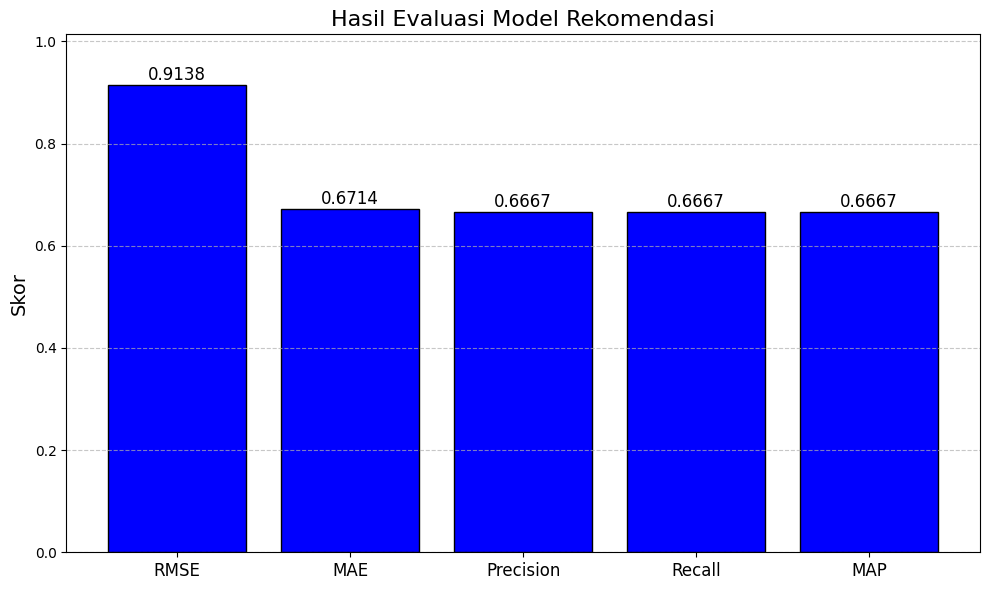

In [13]:
import matplotlib.pyplot as plt

# Hasil evaluasi model
evaluation_metrics = {
    "RMSE": val_rmse,
    "MAE": val_mae,
    "Precision": precision_val,
    "Recall": recall_val,
    "MAP": map_val
}

# Membuat plot diagram batang
plt.figure(figsize=(10, 6))
plt.bar(evaluation_metrics.keys(), evaluation_metrics.values(), color='blue', edgecolor='black')

# Menambahkan anotasi nilai di atas batang
for i, v in enumerate(evaluation_metrics.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Konfigurasi plot
plt.title("Hasil Evaluasi Model Rekomendasi", fontsize=16)
plt.ylabel("Skor", fontsize=14)
plt.ylim(0, max(evaluation_metrics.values()) + 0.1)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan plot
plt.tight_layout()
plt.show()

## Kode di atas digunakan untuk membuat diagram batang yang menampilkan hasil evaluasi model rekomendasi berdasarkan beberapa metrik,
## yaitu RMSE, MAE, Precision, Recall, dan MAP. Data hasil evaluasi disimpan dalam dictionary dan digunakan untuk membuat plot dengan matplotlib.
## Setiap batang diberi anotasi yang menunjukkan nilai metrik yang sesuai, dan plot dikonfigurasi dengan judul, label sumbu, serta grid di sumbu Y
## untuk memudahkan pembacaan. Plot ini memberikan gambaran visual yang jelas tentang kinerja model berdasarkan metrik evaluasi yang digunakan. Setelah itu,
## plot ditampilkan dengan plt.show().

In [22]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Membaca dataset train_data
train_data = pd.read_csv("/content/train.csv")

# Periksa kolom yang tersedia di dataset
print("Kolom tersedia di dataset:", train_data.columns)

# Membuat matriks pengguna-item dari dataset
user_item_matrix = train_data.pivot_table(
    index='ReviewerId',  # Baris sebagai ID pengguna
    columns='PlaceID',   # Kolom sebagai ID tempat wisata
    values='Rating',     # Nilai berupa rating
    aggfunc='mean'       # Agregasi rata-rata (jika ada duplikasi)
)

# Mengisi nilai kosong (tempat wisata yang belum dirating) dengan 0
user_item_matrix = user_item_matrix.fillna(0)

# Melatih model KNN
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)

# 5. Menampilkan Top 5 Rekomendasi Tempat Wisata Secara Keseluruhan dalam Bentuk Tabel
def get_top_n_overall_recommendations(user_item_matrix, model, train_data, n=5):
    """
    Menghasilkan rekomendasi untuk keseluruhan tempat wisata berdasarkan model KNN.
    """
    recommendations = []

    # Mencari tetangga pengguna berdasarkan pola rating mereka
    for user_id in user_item_matrix.index:
        user_ratings = user_item_matrix.loc[user_id].values.reshape(1, -1)  # Bentuk data untuk KNN

        # Mencari tetangga pengguna yang relevan
        distances, indices = model.kneighbors(user_ratings, n_neighbors=5)

        # Menghitung rata-rata rating berdasarkan tetangga pengguna yang relevan
        recommended_places = user_item_matrix.iloc[indices.flatten(), :].mean(axis=0)

        # Menyusun rekomendasi berdasarkan rating tertinggi
        for place_id, predicted_rating in recommended_places.items():
            recommendations.append((place_id, predicted_rating))

    # Mengurutkan rekomendasi berdasarkan prediksi rating tertinggi
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    # Ambil n rekomendasi teratas
    top_n_recommendations = recommendations[:n]

    # Membuat DataFrame untuk menampilkan hasil dalam bentuk tabel
    recommendation_df = pd.DataFrame(top_n_recommendations, columns=['PlaceID', 'Predicted Rating'])

    # Menambahkan kolom nama tempat berdasarkan PlaceID
    if 'Nama_tempat_wisata' in train_data.columns:
        recommendation_df['Nama Tempat Wisata'] = recommendation_df['PlaceID'].apply(
            lambda place_id: train_data[train_data['PlaceID'] == place_id]['Nama_tempat_wisata'].values[0])
    elif 'NamaTempatWisata' in train_data.columns:
        recommendation_df['Nama Tempat Wisata'] = recommendation_df['PlaceID'].apply(
            lambda place_id: train_data[train_data['PlaceID'] == place_id]['NamaTempatWisata'].values[0])
    else:
        print(".")
        recommendation_df = recommendation_df[['PlaceID', 'Predicted Rating']]

    # Menyusun ulang kolom agar tampil dalam urutan yang diinginkan
    if 'Nama Tempat Wisata' in recommendation_df.columns:
        recommendation_df = recommendation_df[['Nama Tempat Wisata', 'Predicted Rating']]

    return recommendation_df

# Menampilkan 5 tempat wisata terbaik berdasarkan prediksi rating dalam bentuk tabel
top_n_overall_recommendations = get_top_n_overall_recommendations(user_item_matrix, model_knn, train_data, n=5)

# Menampilkan hasil rekomendasi dalam bentuk tabel
print("Top 5 Rekomendasi Tempat Wisata:")
print(top_n_overall_recommendations)

Kolom tersedia di dataset: Index(['ReviewerId', 'PlaceID', 'Rating'], dtype='object')
.
Top 5 Rekomendasi Tempat Wisata:
   PlaceID  Predicted Rating
0       96               5.0
1       15               5.0
2       90               5.0
3       95               5.0
4      101               5.0
